# Short Course: Machine Learning for Exploration Geophysics

Hamburg, 10. - 12. March 2020

#### Computer Class 5.1: Example DNN

Table of Content:
- [Packages](#Packages)
- [Import and preprocess the dataset](#Import-and-preprocess-the-dataset)
- [Visualize-the-results](Visualize-the-results)

## Packages

Let's first import all the packages: 
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org/) is a software library for data manipulation and analysis.
- [matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- [seaborn](https://seaborn.pydata.org/) is a statistical data visualization library based on matplotlib.
- [scikit-learn](https://scikit-learn.org/stable/) is a simple and efficient tools for predictive data analysis.
- [tensorflow](https://www.tensorflow.org/) is an end-to-end open source machine learning platform. 

In [1]:
#!pip install pandas
#!pip install -U scikit-learn

#!python -m pip install -U pip
#!python -m pip install -U matplotlib

#!pip install pandas

#!pip install seaborn

#!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils


import warnings
warnings.filterwarnings('ignore')

print('Pandas:  ' + pd.__version__)
print('Numpy:   ' + np.__version__)
print('Sklearn: ' + sklearn.__version__)

Pandas:  0.24.2
Numpy:   1.17.4
Sklearn: 0.22.2.post1


Using TensorFlow backend.


## Import and preprocess the dataset

We will use the [MNIST database](http://yann.lecun.com/exdb/mnist/) of handwritten digits, that, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. 

In [3]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

## Explore the data

In [4]:
print('size of training images:', X_train.shape)
print('size of training labels:', Y_train.shape)
print('size of test images:', X_test.shape)
print('size of test labels:', Y_test.shape)

size of training images: (60000, 28, 28)
size of training labels: (60000,)
size of test images: (10000, 28, 28)
size of test labels: (10000,)


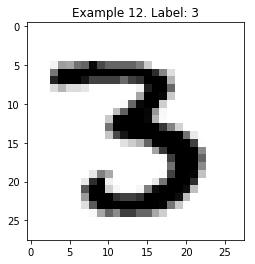

In [5]:
sample = 12
image = X_train[sample].squeeze()
plt.title('Example %d. Label: %d' % (sample, Y_train[sample]))
plt.imshow(image, cmap=plt.cm.gray_r)

### The number of unique entries for each number

In [6]:
count = np.unique(Y_train, return_counts=True)
df = pd.DataFrame({'Label':count[0], 'Count':count[1]})
df

,Label,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


## Data Preprocessing

NN algorithms benefit from standardization of the data set.

In [7]:
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
#X_train = X_train.astype('float32')     
#X_test = X_test.astype('float32')     
X_train = X_train/255    
X_test = X_test/255
Y_train = np_utils.to_categorical(Y_train, 10)     
Y_test = np_utils.to_categorical(Y_test, 10)

## Create train and CV datasets

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(48000, 784)
(48000, 10)
(12000, 784)
(12000, 10)


## DNN model

- Size of input layer: 784
- Size of hidden layer: 400
- Output: 10

In [9]:
model = keras.Sequential([
    keras.layers.Dense(400, input_dim=784, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
               metrics=['accuracy'])

## Train the model

- batch_size = 128   
- epochs = 30


In [11]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128, epochs=30)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 2s 37us/sample - loss: 0.3115 - acc: 0.9119 - val_loss: 0.1789 - val_acc: 0.9477
Epoch 2/30
48000/48000 [==============================] - 2s 35us/sample - loss: 0.1327 - acc: 0.9611 - val_loss: 0.1379 - val_acc: 0.9579
Epoch 3/30
48000/48000 [==============================] - 2s 36us/sample - loss: 0.0891 - acc: 0.9737 - val_loss: 0.1080 - val_acc: 0.9699
Epoch 4/30
48000/48000 [==============================] - 2s 35us/sample - loss: 0.0644 - acc: 0.9816 - val_loss: 0.0954 - val_acc: 0.9734
Epoch 5/30
48000/48000 [==============================] - 2s 36us/sample - loss: 0.0478 - acc: 0.9863 - val_loss: 0.0800 - val_acc: 0.9750
Epoch 6/30
48000/48000 [==============================] - 2s 35us/sample - loss: 0.0363 - acc: 0.9898 - val_loss: 0.0760 - val_acc: 0.9778
Epoch 7/30
48000/48000 [==============================] - 2s 37us/sample - loss: 0.0283 - acc: 0.9921 - val_loss: 0.

## Test the model

In [12]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 

10000/10000 [==============================] - 0s 36us/sample - loss: 0.0881 - acc: 0.9807

Test accuracy: 0.9807
